In [30]:
from sklearn.metrics import davies_bouldin_score
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")

In [5]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mode(),inplace=True)

In [6]:
data2=data
data.head()
data2.drop("CUST_ID",axis=1,inplace=True)

In [7]:
data2["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [8]:
data2["MINIMUM_PAYMENTS"].fillna(data2["MINIMUM_PAYMENTS"].mean(),inplace=True)
data2["CREDIT_LIMIT"].fillna(data2["CREDIT_LIMIT"].mean(),inplace=True)

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [10]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(data) 
clust_labels
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,3
1,1
2,1
3,1
4,3
...,...
8945,3
8946,3
8947,3
8948,3


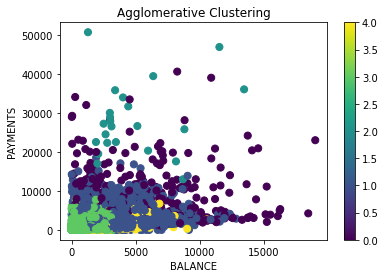

In [29]:

import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

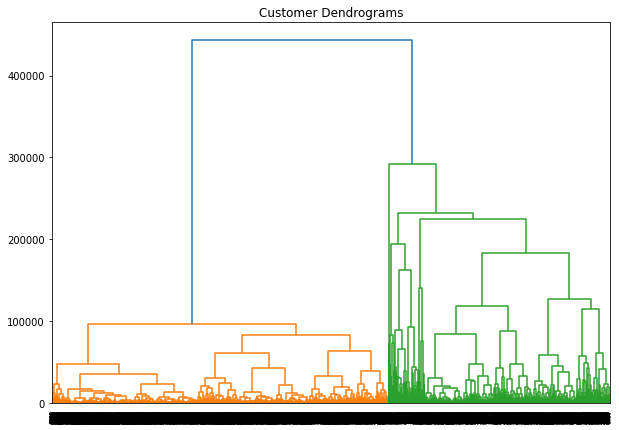

In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data2, method="ward"))

In [24]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=6, random_state=0)
kmeans.fit(data2)

KMeans(n_clusters=6, random_state=0)

In [25]:
labels=pd.DataFrame(kmeans.labels_)
labels
data["label"]=labels
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


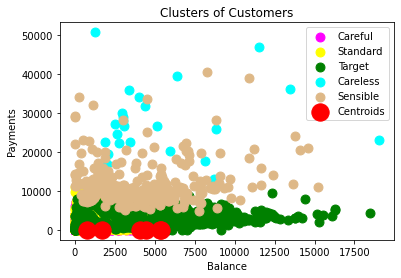

In [26]:
plt.scatter(data["BALANCE"][data.label == 0],          
            data["PAYMENTS"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.label == 1],
           data["PAYMENTS"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.label == 2],
           data["PAYMENTS"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][data.label == 3], 
           data["PAYMENTS"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][data.label == 4], 
           data["PAYMENTS"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Balance')
plt.ylabel('Payments')
plt.legend()
plt.show()

In [27]:
Sum_of_squared_distances = []
K = range (1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data2)
    Sum_of_squared_distances.append(km.inertia_)
    

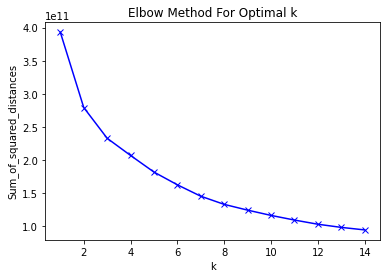

In [28]:
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# best K value is 6

# Both Results are bad clustering they don't give enough infos and intrepretations .

# The Aggromelative Clustring is a bit better 

In [32]:
data3=data2.drop("label",axis=1)
data3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(data3)
labels = kmeans.labels_
davies_bouldin_score(data3, labels)

1.1970298807621902

In [40]:
davies_bouldin_score(data3,clust_labels)

1.3750864065420694

# Using the D.Bouldin Score kMeans present better clustering results